In [1]:
from sympy import symbols, cos, sin, pi, Matrix, rad

# Define the symbolic variables for joint angles
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")

# DH Parameters
d1, a1, alpha1 = 0.05, 0, 0  # Joint 1 rotates about z-axis
d2, a2, alpha2 = 0, 0.03, pi / 2  # Joint 2 shifts axis to y, hence 90-degree shift
d3, a3, alpha3 = 0, 0.25, 0  # Following joints rotate around y-axis, no alpha shift
d4, a4, alpha4 = 0, 0.28, 0
d5, a5, alpha5 = (
    0,
    0.28,
    0,
)  # Note: This should be the link before the end, if any confusion clarify


# Define the transformation matrix using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix(
        [
            [
                cos(theta),
                -sin(theta) * cos(alpha),
                sin(theta) * sin(alpha),
                a * cos(theta),
            ],
            [
                sin(theta),
                cos(theta) * cos(alpha),
                -cos(theta) * sin(alpha),
                a * sin(theta),
            ],
            [0, sin(alpha), cos(alpha), d],
            [0, 0, 0, 1],
        ]
    )


# Compute individual transformation matrices
T1 = DH_matrix(theta1, d1, a1, alpha1)
T2 = DH_matrix(theta2, d2, a2, alpha2)
T3 = DH_matrix(theta3, d3, a3, alpha3)
T4 = DH_matrix(theta4, d4, a4, alpha4)
T5 = DH_matrix(theta5, d5, a5, alpha5)

# Overall transformation matrix from the base to the end-effector
T = T1 * T2 * T3 * T4 * T5
# Uncomment to display the matrix
print(T)


Matrix([[(-(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3)*sin(theta4) + (-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3)*cos(theta4))*cos(theta5) + (-(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3)*cos(theta4) - (-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta4)*cos(theta3))*sin(theta5), -(-(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3)*sin(theta4) + (-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3)*cos(theta4))*sin(theta5) + (-(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3)*cos(theta4) - (-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta4)*cos(theta3))*cos(theta5), sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), -0.28*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3)*sin(theta4) + 0.28*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3)*cos(theta4) + 0.25*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) + 0.28*(-(

In [2]:

################  Numerical Evaluation  ################


# Compute individual transformation matrices with joint angles
T1 = DH_matrix(-pi, d1, a1, alpha1)
T2 = DH_matrix(-pi / 6, d2, a2, alpha2)
T3 = DH_matrix(-pi / 6, d3, a3, alpha3)
T4 = DH_matrix(-pi / 6, d4, a4, alpha4)
T5 = DH_matrix(-pi / 6, d5, a5, alpha5)

# Overall transformation matrix from the base to the end-effector
T = T1 * T2 * T3 * T4 * T5

# Extracting the position and orientation from the transformation matrix
x, y, z = T[0, 3], T[1, 3], T[2, 3]
orientation = T[:3, :3]

# Display results
print("Position of the End Effector (x, y, z):")
print(f"x = {x.evalf()}")
print(f"y = {y.evalf()}")
print(f"z = {z.evalf()}\n")

print("Orientation Matrix of the End Effector:")
print(orientation.evalf())
print("\n")
# Overall transformation matrix from the base to the end-effector
T = T1 * T2 * T3 * T4 * T5
T.evalf()  # Evaluate the matrix numerically for clarity
print("Numerical Evaluation of the Transformation Matrix:")
print(T.evalf())


Position of the End Effector (x, y, z):
x = -0.334724318643355
y = 0.193253175473055
z = -0.597487113059643

Orientation Matrix of the End Effector:
Matrix([[0, -0.866025403784439, 0.500000000000000], [0, 0.500000000000000, 0.866025403784439], [-1.00000000000000, 0, 0]])


Numerical Evaluation of the Transformation Matrix:
Matrix([[0, -0.866025403784439, 0.500000000000000, -0.334724318643355], [0, 0.500000000000000, 0.866025403784439, 0.193253175473055], [-1.00000000000000, 0, 0, -0.597487113059643], [0, 0, 0, 1.00000000000000]])


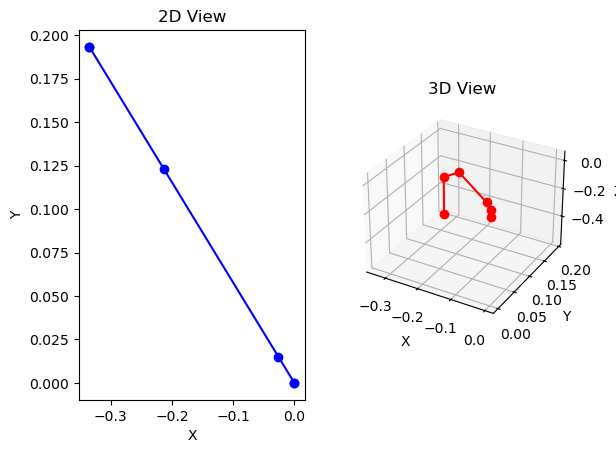

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, cos, sin, pi, Matrix, N

# Define symbolic variables
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")

# DH Parameters
d1, a1, alpha1 = 0.05, 0, 0
d2, a2, alpha2 = 0, 0.03, pi / 2
d3, a3, alpha3 = 0, 0.25, 0
d4, a4, alpha4 = 0, 0.28, 0
d5, a5, alpha5 = 0, 0.28, 0


# Define the transformation matrix function using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix(
        [
            [
                cos(theta),
                -sin(theta) * cos(alpha),
                sin(theta) * sin(alpha),
                a * cos(theta),
            ],
            [
                sin(theta),
                cos(theta) * cos(alpha),
                -cos(theta) * sin(alpha),
                a * sin(theta),
            ],
            [0, sin(alpha), cos(alpha), d],
            [0, 0, 0, 1],
        ]
    )


# Define joint angles in radians
angles = {
    theta1: -pi,
    theta2: -pi / 6,
    theta3: -pi / 6,
    theta4: -pi / 6,
    theta5: -pi / 6,
}

# Compute transformation matrices
T1 = DH_matrix(theta1, d1, a1, alpha1).subs(angles)
T2 = DH_matrix(theta2, d2, a2, alpha2).subs(angles)
T3 = DH_matrix(theta3, d3, a3, alpha3).subs(angles)
T4 = DH_matrix(theta4, d4, a4, alpha4).subs(angles)
T5 = DH_matrix(theta5, d5, a5, alpha5).subs(angles)

# Calculate cumulative transformations
T01 = T1
T02 = T01 * T2
T03 = T02 * T3
T04 = T03 * T4
T05 = T04 * T5

# Extract positions
positions = [
    Matrix([0, 0, 0, 1]),
    T01[:3, 3],
    T02[:3, 3],
    T03[:3, 3],
    T04[:3, 3],
    T05[:3, 3],
]
positions = [N(p) for p in positions]  # Evaluate numerically

# Plotting
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

# 2D plot
x_vals = [p[0] for p in positions]
y_vals = [p[1] for p in positions]
ax1.plot(x_vals, y_vals, "bo-")
ax1.set_title("2D View")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

# 3D plot
x_vals = [p[0] for p in positions]
y_vals = [p[1] for p in positions]
z_vals = [p[2] for p in positions]
ax2.plot(x_vals, y_vals, z_vals, "ro-")
ax2.set_title("3D View")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, cos, sin, pi, Matrix, N
import ipywidgets as widgets
from IPython.display import display

# Define symbolic variables
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")

# DH Parameters
d1, a1, alpha1 = 0.05, 0, 0
d2, a2, alpha2 = 0, 0.03, pi / 2
d3, a3, alpha3 = 0, 0.25, 0
d4, a4, alpha4 = 0, 0.28, 0
d5, a5, alpha5 = 0, 0.28, 0

# Define the transformation matrix function using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix([
        [cos(theta), -sin(theta) * cos(alpha), sin(theta) * sin(alpha), a * cos(theta)],
        [sin(theta), cos(theta) * cos(alpha), -cos(theta) * sin(alpha), a * sin(theta)],
        [0, sin(alpha), cos(alpha), d],
        [0, 0, 0, 1],
    ])

def update_plot(theta1_val, theta2_val, theta3_val, theta4_val, theta5_val):
    angles = {theta1: theta1_val, theta2: theta2_val, theta3: theta3_val, theta4: theta4_val, theta5: theta5_val}
    T1 = DH_matrix(theta1, d1, a1, alpha1).subs(angles)
    T2 = DH_matrix(theta2, d2, a2, alpha2).subs(angles)
    T3 = DH_matrix(theta3, d3, a3, alpha3).subs(angles)
    T4 = DH_matrix(theta4, d4, a4, alpha4).subs(angles)
    T5 = DH_matrix(theta5, d5, a5, alpha5).subs(angles)

    # Cumulative transformations
    T01 = T1
    T02 = T01 * T2
    T03 = T02 * T3
    T04 = T03 * T4
    T05 = T04 * T5

    # Extract positions
    positions = [Matrix([0, 0, 0, 1]), T01[:3, 3], T02[:3, 3], T03[:3, 3], T04[:3, 3], T05[:3, 3]]
    positions = [N(p) for p in positions]  # Numeric evaluation

    # Plotting
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')

    x_vals = [p[0] for p in positions]
    y_vals = [p[1] for p in positions]
    z_vals = [p[2] for p in positions]

    ax.plot(x_vals, y_vals, z_vals, "ro-")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Robot Arm Configuration")
    plt.show()

# Sliders with joint limits for theta2 to theta5 set from -pi/2 to pi/2
theta1_slider = widgets.FloatSlider(min=-np.pi, max=np.pi, step=0.1, value=-np.pi)
theta2_slider = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=-np.pi/6)
theta3_slider = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=-np.pi/6)
theta4_slider = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=-np.pi/6)
theta5_slider = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=-np.pi/6)

ui = widgets.VBox([
    theta1_slider, theta2_slider, theta3_slider, theta4_slider, theta5_slider
])
out = widgets.interactive_output(update_plot, {
    'theta1_val': theta1_slider, 
    'theta2_val': theta2_slider, 
    'theta3_val': theta3_slider, 
    'theta4_val': theta4_slider, 
    'theta5_val': theta5_slider
})

display(ui, out)


Output()